<h1>Litecoin Price Analysis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Department of Analytics, Northeastern University
EAI 6010: Applications of Artificial Intelligence



---


Melania Bonnie Mendes
February 26, 2023


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


1.   Introduction 
2.   Importing packages
3.   Importing data 
4.   Data preprocessing
5.   Price Analysis
6.   Conclusion 
7.   References





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




<h1>Introduction<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


Cryptocurrency is an encrypted digital currency that runs on a public ledger called the block chain. Litecoin is a cryptocurrency founded in 2011, two years after Bitcoin by a former Google engineer McFarlane, G. (2022). This study examines the price of litecoin from the **bitstamp** exchange and the changes in its pricing pattern over the last 100 days starting November 15, 2022. The study involves a complete analysis of seven variables comprising of ‘Close Time',  'Open Price',  'High Price',  'Low Price',  'Close Price',  'Volume', 'NA’ using Jupiter Notebook. 


<h1>Importing Packages<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


  This tutorial, inspired by the obsolete by now post on https://notebooks.ai,  where we pulled Litecoin cryptocurrency prices from a public API and downloaded them as Excel files. We installed two libraries : *requests*  (required to pull data from the web) and *pandas* that was required to process the data. May require `pip install requests`

In [4]:
import requests
import pandas as pd

<h1>Importing Data<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

We have predefined a function that simplifies the process of importing data from **Cryptowatch**. Using this function we generated the seven variables comprising of ‘Close Time', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume', 'NA’ required for our analysis. Cryptowatch makes it easy to keep a constant watch on the crypto market and make trades when the conditions are favourable. 



In [5]:
def get_historic_price(symbol, exchange='bitstamp', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

<h1>Data Preprocessing<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


Using the following code, the data was pulled for Litecoin - one of the most popular cryptocurrency from the exhange for the period of last 100 days with a timestamp. 

In [6]:
last_100days = (pd.Timestamp.now() - pd.offsets.Day(100))
last_100days

Timestamp('2022-11-18 23:29:34.101115')

The historic prices of litecoin provided the opening price, closing price, volume traded, highest and lowest price during a given trading cycle. The following code ltc.tail was performed to check if the results were in the desired format.

In [7]:
ltc = get_historic_price('ltc', 'bitstamp', after=last_100days)
ltc.tail()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-02-26 20:00:00,95.13,95.36,94.92,95.17,116.137687,11061.758085
2023-02-26 21:00:00,95.11,95.50,95.07,95.42,408.665949,38955.142465
2023-02-26 22:00:00,95.24,95.30,95.11,95.12,658.270711,62713.541014
2023-02-26 23:00:00,95.12,95.21,94.14,94.26,173.032666,16422.098346
2023-02-27 00:00:00,94.96,95.16,94.92,95.16,151.313561,14374.660748


In the steps ahead, as a result of getting a better view of litecoins performance we plotted the graph which represented the price performance/ patterns from November 2022 to February 2023. During the seasonal period there was a decline in the price while it exponentially increased in January 2023.

<AxesSubplot:xlabel='CloseTime'>

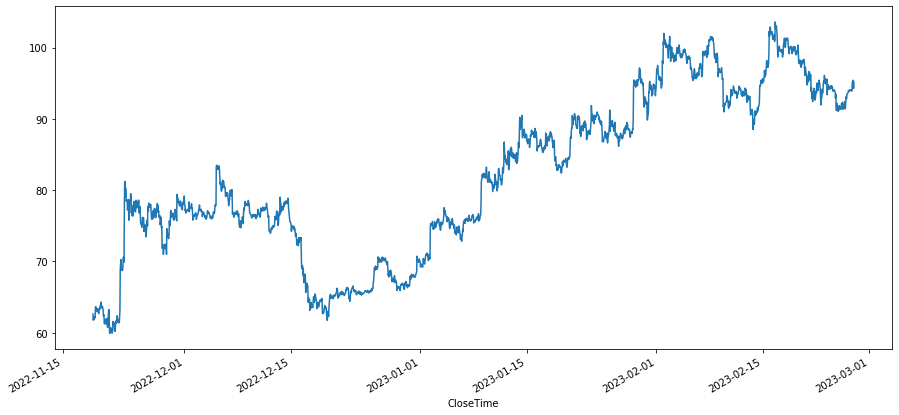

In [8]:
ltc['ClosePrice'].plot(figsize=(15, 7))

<h1>Dynamic Plots with Bokeh<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


Bokeh is used to generate highly interactive graphs and visualizations. The grapoh of "Crypto Prices" provides an good view of the price of Litecoin and its spike from January 2023. 

May need to `pip install bokeh`

In [9]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p1 = figure(x_axis_type="datetime", title="Crypto Prices")
p1.plot_height=400
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price $'
p1.line(ltc.index, ltc['ClosePrice'], color='#f2a900', legend_label='Litecoin')
p1.legend.location = "top_left"

show(p1)

**Exporting to Excel**

In this section we exported the file to Excel for further analysis

In [10]:
writer = pd.ExcelWriter('Litecoin_history.xlsx')
ltc.to_excel(writer, sheet_name='Litecoin')
writer.save()



<h1>Conclusion<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Price of Litecoin has seen a signifciant increase over the last 100 days and is very volatile. The prices ranged from $90-98 in February. 
We observed a seasonal impact which results in declining price of Litecoin. 



<h1>References<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Project Jupyter. (n.d.). Home. https://jupyter.org/ 

CoinDesk: Bitcoin, Ethereum, Crypto News and Price Data. (n.d.). https://www.coindesk.com/tag/bitstamp/
